In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import jieba
from gensim.models import word2vec

# 导入豆瓣评论数据

In [2]:
train_df = pd.read_csv('DMSC.csv')

In [3]:
train_df

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017-01-22,2,更深的白色,2015-04-24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017-01-22,3,有意识的贱民,2015-04-26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017-01-22,4,不老的李大爷耶,2015-04-23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017-01-22,5,ZephyrO,2015-04-22,2,虽然从头打到尾，但是真的很无聊啊。,723
...,...,...,...,...,...,...,...,...,...,...
2125051,2125051,Zootopia,疯狂动物城,2017-01-04,141196,猫的烟火尾巴,2016-03-06,4,真好看 兔子警官又美有善良又可爱~简直理想结婚对象！每一个动物造型都是那么赞~,0
2125052,2125052,Zootopia,疯狂动物城,2017-01-04,141197,Tosta,2016-03-05,5,六星好评！像头脑特工队那样惊喜！,0
2125053,2125053,Zootopia,疯狂动物城,2017-01-04,141198,風立ちぬ,2016-03-11,4,欢乐而又深刻，是童话故事更是政治寓言。,0
2125054,2125054,Zootopia,疯狂动物城,2017-01-04,141199,P I T T,2016-03-05,5,对现实世界歧视和偏见的影射妙哉妙哉，不要害怕打破常规，try everything,0


# 查看样本分布

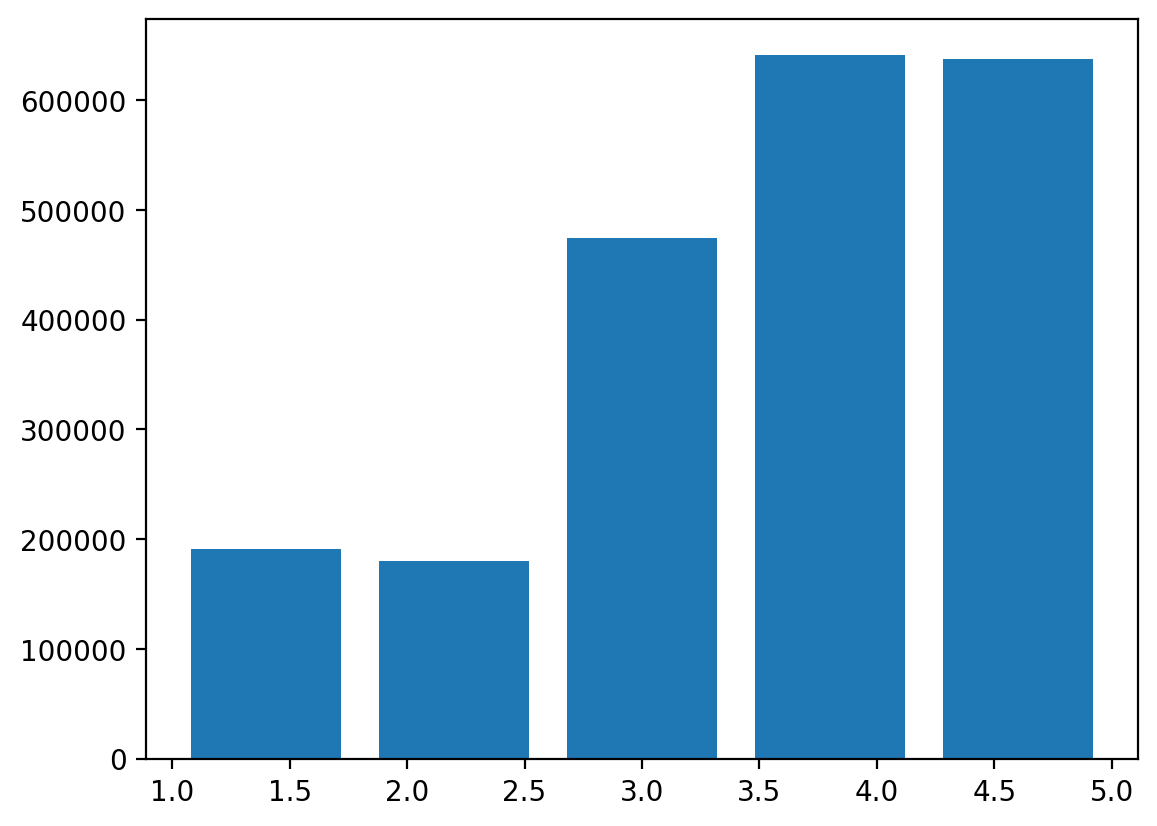

In [4]:
plt.figure(dpi=200)
plt.hist(train_df['Star'], range=[1,5], bins=5, rwidth=0.8)
plt.show()

# 分词并储存到文件

In [5]:
stop_df = pd.read_csv('cn_stopwords.txt')
stop_words = set(stop_df.values[:,0])

In [6]:
class SpiltIter(object):
    match = re.compile('[\w]+')

    def __init__(self, text):
        self.iter = jieba.cut(text, cut_all=False)

    def __iter__(self):
        return self

    def __next__(self):
        while True:
            token = next(self.iter)
            if self.match.fullmatch(token) and token not in stop_words:
                return token

In [7]:
# 只使用20K条评论
indicator = np.random.choice(len(train_df), 40000)

In [8]:
indicator

array([1129220, 1942074, 1855266, ...,  953920, 1864546,  551362])

In [ ]:
with open("data.txt", "w", encoding='utf-8') as f:
    for i in indicator:
        f.write(" ".join(SpiltIter(train_df['Comment'][i])))
        f.write("\n")
    f.close()

In [10]:
label = train_df['Star'][indicator].values.astype(dtype='int')
# # 二值化
# label[label >= 4] = 1
# label[label <= 3] = 0
np.savetxt('label.txt', label, fmt='%d')

# 查看句子平均长度

In [11]:
data_len = [len(row[1]['Comment']) for row in train_df.iterrows()]

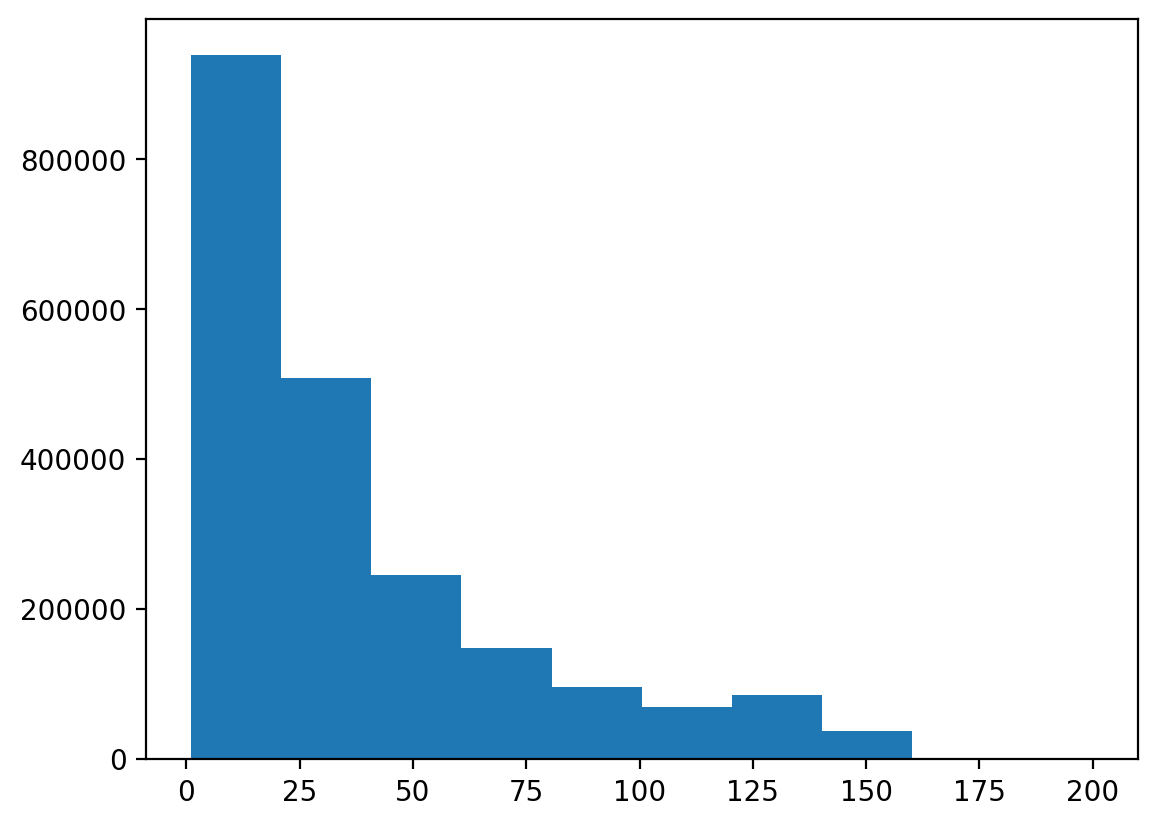

200

In [12]:
plt.figure(dpi=200)
plt.hist(data_len)
plt.show()

max(data_len)